In [2]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("VGG16", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 416, 416, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 416, 416, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 416, 416, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 208, 208, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 208, 208, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 208, 208, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 104, 104, 128)     0         
__________

In [10]:
import json
with open('configs/from_scratch_vgg.json') as file:
    config_json = json.load(file)

In [11]:
labels = ['object']

In [6]:
yolo_model = create_yolo(config_json['model']['architecture'], # CNN 아키텍쳐(Full Yolo, Tiny Yolo, MobileNet, SqueezeNet, VGG16, ResNet50, and Inception3)
                         labels, # 레이블
                         config_json['model']['input_size'], # 이미지의 입력 데이터 사이즈
                         config_json['model']['anchors'], # 앵커? 리스트(10)
                         config_json['model']['coord_scale'], # 위치와 크기(x, y, w, h)를 잘못 예측했을 때 얼마나 penalize할건지 결정(1.0)
                         config_json['model']['class_scale'], # 클래스를 잘못 예측했을 때 얼나마 penalize할건지 결정(1.0)
                         config_json['model']['object_scale'], # 물체의 confidence를 잘못 예측했을 때 얼마나 penalize할건지 결정(5.0)
                         config_json['model']['no_object_scale']) # 물체가 아닌 것의 confidence를 잘못 예측했을 때 얼마나 penalize할건지 결정(1.0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 416, 416, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 416, 416, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 416, 416, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 208, 208, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 208, 208, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 208, 208, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 104, 104, 128)     0         
__________

In [7]:
yolo_model

In [12]:
yolo_model.load_weights(config_json['pretrained']['full'], by_name=True)

Fail to load pre-trained weights. Make sure weight file path.


In [13]:
weight_file = 'weights/weights.h5'

In [14]:
yolo_model.train(config_json['train']['train_image_folder'], # 학습데이터 이미지 저장된 폴더
           config_json['train']['train_annot_folder'], # 학습데이터 annotation 저장된 폴더
           config_json['train']['actual_epoch'], # 전체데이터가 학습되는 횟수

           weight_file,

           config_json["train"]["batch_size"], # 배치 사이즈
           config_json["train"]["jitter"], # ? (false)
           config_json['train']['learning_rate'], # learning rate

           config_json['train']['train_times'], # ? (5)
           config_json['train']['valid_times'], # ? (1)

           config_json['train']['valid_image_folder'], # 검증데이터 이미지 저장된 폴더
           config_json['train']['valid_annot_folder'], # 검증데이터 annotation 저장된 폴더

           config_json['train']['first_trainable_layer'], # (input_1)
           config_json['train']['is_only_detect']) # (true)

KeyboardInterrupt: 

In [ ]:
yolo_detector = create_yolo("VGG16", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)
DEFAULT_WEIGHT_FILE = os.path.join('C:/Users/Daumsoft/Downloads/Yolo-digit-detector-master/svhn/', "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

0-boxes are detected.


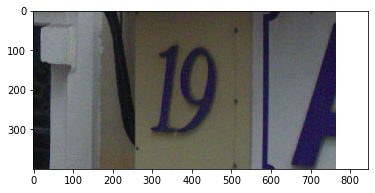

0-boxes are detected.


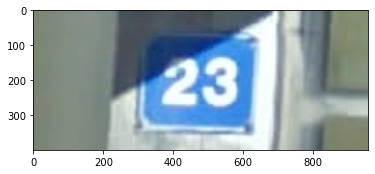

In [69]:
# 4. Predict digit region

THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()


In [3]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [4]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in C:\Users\Daumsoft\Downloads\Yolo-digit-detector-master\weights.h5


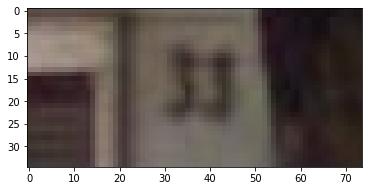

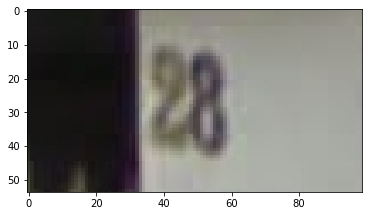

In [37]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
# DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "dataset", "svhn", "imgs", "train_small")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "6.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "7.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

In [38]:
imgs[0].shape

(35, 74, 3)

In [39]:
imgs[1].shape

(54, 99, 3)

2-boxes are detected.
예측값: [3 3]


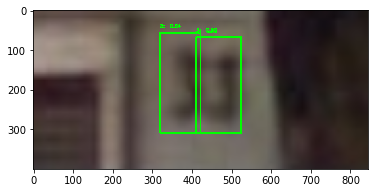

2-boxes are detected.
예측값: [2 8]


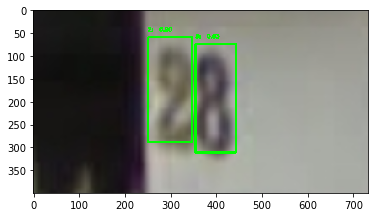

In [40]:
# 4. Predict digit region
from yolo.backend.utils.box import draw_scaled_boxes

THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    labels = np.argmax(probs, axis=1) if len(probs) > 0 else [] 
    print("예측값:", labels)
    plt.imshow(image)
    plt.show()

In [44]:
print(boxes.shape)
boxes

(2, 4)


array([[34,  8, 47, 39],
       [48, 10, 60, 42]])

In [35]:
import numpy as np
labels = np.argmax(probs, axis=1) if len(probs) > 0 else [] 
print("예측값:", labels)

array([9, 3], dtype=int64)

In [32]:
boxes.shape

(2, 4)

In [33]:
probs.shape

(2, 10)

In [134]:
from yolo.backend.utils.annotation import parse_annotation

annotations = parse_annotation(config_json['train']['train_annot_folder'],
                               config_json['train']['train_image_folder'],
                               config_json['model']['labels'],
                               is_only_detect=False)
print(dir(annotations))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_components', '_label_namings', '_valid_index', 'add', 'boxes', 'code_labels', 'fname', 'labels', 'n_classes', 'shuffle']


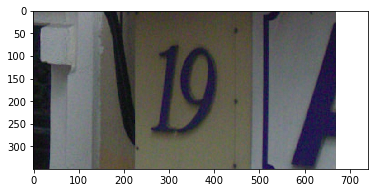

실제값===>  [1, 9]
예측값===>  [1 9]


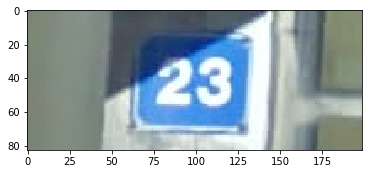

실제값===>  [2, 3]
예측값===>  [1 2 3]


In [139]:
for i in range(len(annotations)):
    img_path = annotations.fname(i)
    img_fname = os.path.basename(img_path)
    image = cv2.imread(img_path)
    
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()
        
    true_boxes = annotations.boxes(i)
    true_labels = annotations.code_labels(i)

    boxes, probs = yolo_detector.predict(image, float(0.3))
    labels = np.argmax(probs, axis=1) if len(probs) > 0 else [] 
    print('실제값===> ', true_labels)
    print('예측값===> ', labels)